#### 1. IMPORT LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import helper
import torch
from torch import optim
from torchvision import datasets, transforms

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### 2. LOAD DATA

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,)),])

#Data 
traindata = datasets.FashionMNIST(root='F_MNIST/', train=True,
                                 download=True,
                                 transform=transform)

trainLoader = torch.utils.data.DataLoader(dataset=traindata,
                                          batch_size=64,
                                         shuffle=True)

#### 3. DEFINE NETWORK

In [12]:
import torch.nn.functional as F
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Layers
        self.fc1 = nn.Linear(784,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128,64)
        self.fc5 = nn.Linear(64,10)
        
        
    def forward(self,x):
        x = x.view(x.shape[0],-1) #flatten the images into a vector
        
        #Activation for Layer 1
        x = F.relu(self.fc1(x))
        #Activation for Layer 1
        x = F.relu(self.fc2(x))
        #Activation for Layer 1
        x = F.relu(self.fc3(x))
        #Activation for Layer 1
        x = F.relu(self.fc4(x))
        #Softmax for the multi-class classification along with the columns(dim=1) 
        x = F.log_softmax(self.fc5(x), dim=1)
        
        return x

#### 4.TRAIN YOUR NETWORK

In [13]:
from torch.optim import Adam

model = Network()

criterion = nn.NLLLoss()

optimizer = Adam(params = model.parameters(), lr= 0.001)

In [15]:
epochs =10

for e in range(epochs):
    running_loss = 0
    for images,labels in trainLoader:
        
        ###FORWARD
        logPs = model(images)
        
        ###CALCULATE LOSS (TRUTH - PREDICTED)
        loss = criterion(logPs, labels)
        
        optimizer.zero_grad() #AVOID GRADIENT ACCUMULATION
        
        ### BACKPROPAGATE W.R.T Weights and BIAS
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training Loss: {running_loss}")
        

Training Loss: 499.6386378854513
Training Loss: 355.1243988648057
Training Loss: 322.18386172503233
Training Loss: 293.77177280932665
Training Loss: 276.8904597684741
Training Loss: 260.43370193243027
Training Loss: 247.22103095054626
Training Loss: 235.19218319281936
Training Loss: 224.68452237918973
Training Loss: 211.94654636085033


#### 5. Test YOUR MODEL

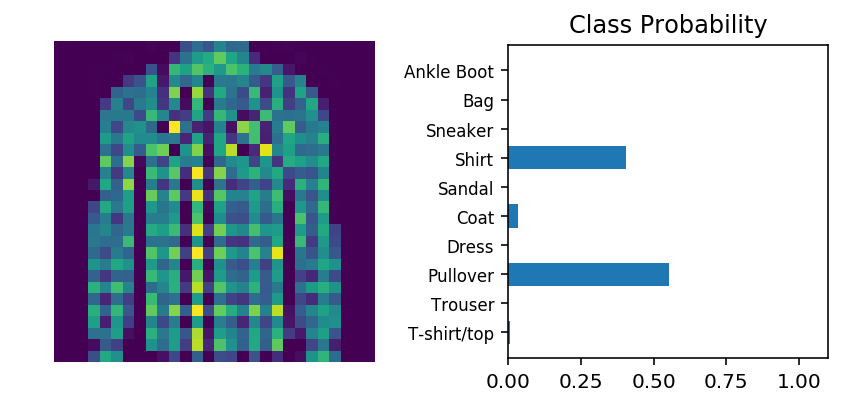

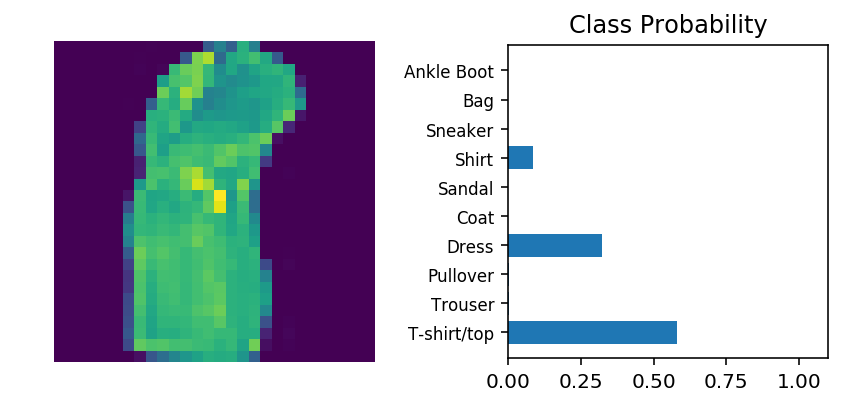

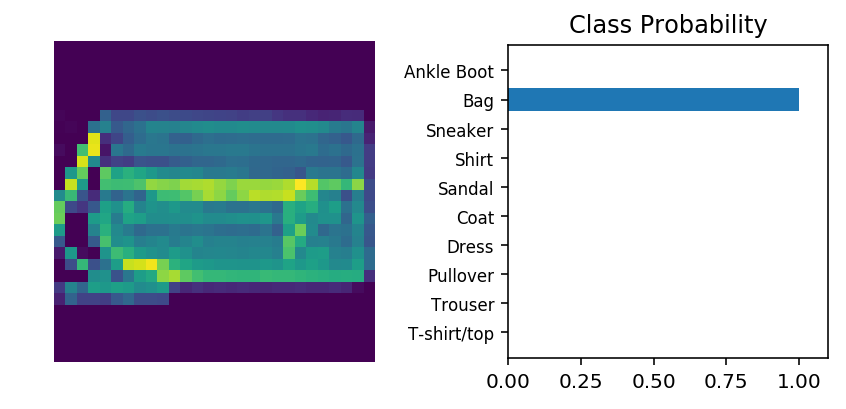

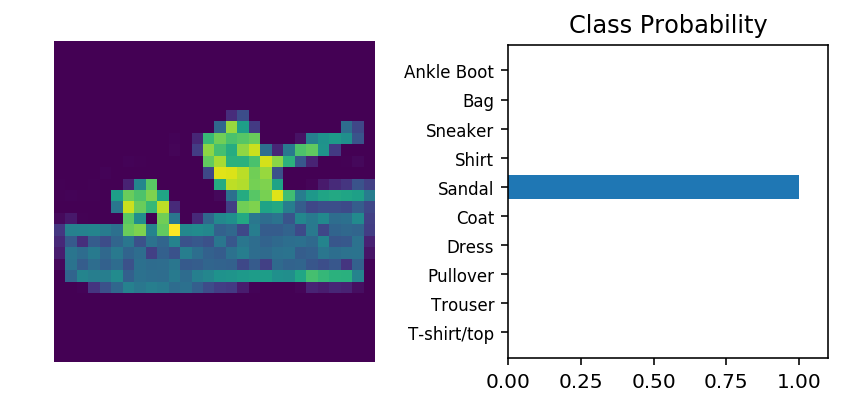

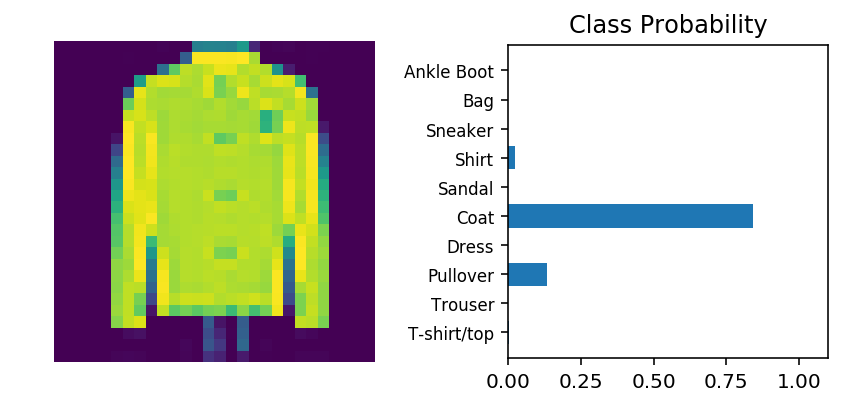

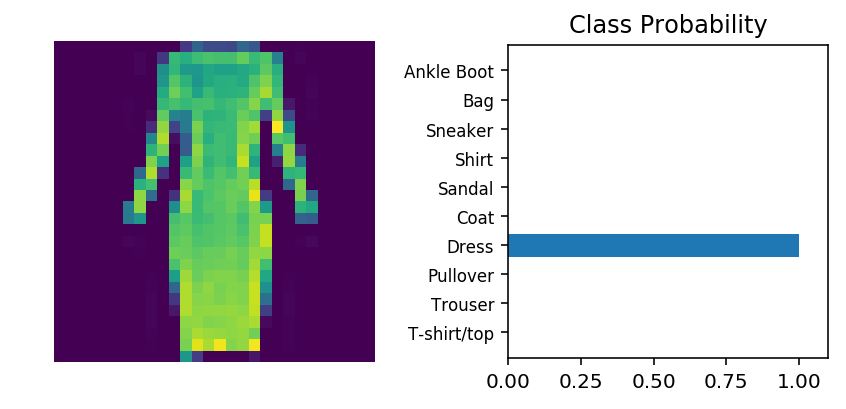

In [19]:
#USing the helper function

dataiter = iter(trainLoader)

images, labels = dataiter.next()

for i in range(6):

    img = images[i]

    ### CALCULATE THE CLASS PROBABILITIES 

    ps = torch.exp(model(img)) #sum of probabilites

    #PLOT
    helper.view_classify(img, ps, version = 'Fashion')